Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100

Epoch: 759
Epoch: 760
Epoch: 761
Epoch: 762
Epoch: 763
Epoch: 764
Epoch: 765
Epoch: 766
Epoch: 767
Epoch: 768
Epoch: 769
Epoch: 770
Epoch: 771
Epoch: 772
Epoch: 773
Epoch: 774
Epoch: 775
Epoch: 776
Epoch: 777
Epoch: 778
Epoch: 779
Epoch: 780
Epoch: 781
Epoch: 782
Epoch: 783
Epoch: 784
Epoch: 785
Epoch: 786
Epoch: 787
Epoch: 788
Epoch: 789
Epoch: 790
Epoch: 791
Epoch: 792
Epoch: 793
Epoch: 794
Epoch: 795
Epoch: 796
Epoch: 797
Epoch: 798
Epoch: 799
Epoch: 800
Epoch: 801
Epoch: 802
Epoch: 803
Epoch: 804
Epoch: 805
Epoch: 806
Epoch: 807
Epoch: 808
Epoch: 809
Epoch: 810
Epoch: 811
Epoch: 812
Epoch: 813
Epoch: 814
Epoch: 815
Epoch: 816
Epoch: 817
Epoch: 818
Epoch: 819
Epoch: 820
Epoch: 821
Epoch: 822
Epoch: 823
Epoch: 824
Epoch: 825
Epoch: 826
Epoch: 827
Epoch: 828
Epoch: 829
Epoch: 830
Epoch: 831
Epoch: 832
Epoch: 833
Epoch: 834
Epoch: 835
Epoch: 836
Epoch: 837
Epoch: 838
Epoch: 839
Epoch: 840
Epoch: 841
Epoch: 842
Epoch: 843
Epoch: 844
Epoch: 845
Epoch: 846
Epoch: 847
Epoch: 848
Epoch: 849

C:\Users\School\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\School\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Accuracy: 0.9666666666666667
Predictions: [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
True: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


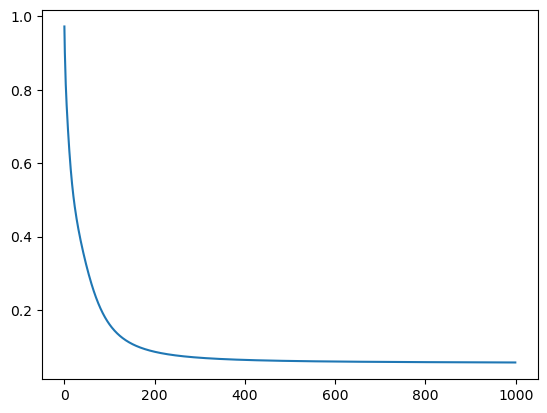

In [1]:
#%% packages
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
#%% Hyperparameters
LR = 0.001
BS = 8
EPOCHS = 1000

# %% data prep
iris = load_iris()
X = iris.data.astype(np.float32)
y_batch = iris.target.astype(np.int64)

# %% train test split
X_train, X_test, y_train, y_test = train_test_split(
     X, y_batch, test_size=0.2, random_state=42)

# %% Dataset and Dataloader
class IrisData(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
        self.len = self.X.shape[0]
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.len
    
iris_data = IrisData(X=X_train, y=y_train)
train_loader = DataLoader(dataset=iris_data, batch_size=BS)

# %% define network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(in_features=4, out_features = 6)
        self.lin2 = nn.Linear(in_features=6, out_features=3)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        x = self.lin1(x)
        x = self.lin2(x)
        x = self.softmax(x)
        return x  

# %% Model instance
model = Net()


# %% Loss function
loss_fn = nn.CrossEntropyLoss()

##% Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# %% Train Loop
losses = []
for epoch in range(EPOCHS):
    loss_batch = []
    print(f"Epoch: {epoch}")
    for x_batch, y_batch in train_loader:
        
        # initialize gradients
        optimizer.zero_grad()
        
        # forward pass
        y_pred = model(x_batch)
        
        # calculate losses
        
        loss = loss_fn(y_pred, y_batch)
        
        # update weights
        loss.backward()
        optimizer.step()
        
        # store loss
        loss_batch.append(loss.item())
    # add average loss for each epoch
    losses.append(sum(loss_batch)/len(loss_batch))
    
        

# %% study the losses
sns.lineplot(x=range(len(losses)), y=losses)

# %% test the model
X_test_torch = torch.from_numpy(X_test)
with torch.no_grad():
    y_test_pred_softmax = model(X_test_torch)
    y_test_hat = torch.argmax(y_test_pred_softmax, dim=1)
    print(f"Accuracy: {sum(y_test_hat.numpy() == y_test)/len(y_test)}")
    print(f"Predictions: {y_test_hat.numpy()}")
    print(f"True: {y_test}")

# %%
